# Aufgabe G Neural Networks Overfitting

- Train a neural net and prevent overfitting by regularization.
- You can use any combination of regularizers we saw in class.
- Use the train and test splits in the data do evaluate the model.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from keras import regularizers, optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import backend as K


Using TensorFlow backend.


# Datenset vorbereiten

In [0]:
batch_size = 32 #128
num_classes = 10
epochs = 20 #Wiederholungen (für Testzweck vllt. 3 / für endgültige Lösung ca. 20)

# Bildgröße für Input
img_rows, img_cols = 32, 32

In [3]:
# Datenset, unterteilt in Trainings-/Testset
cifar = cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0],3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

In [6]:
# Aufräumen + Anpassen

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


# Modell trainieren + Auswertung

In [0]:
def model_G():
    
    weight_decay = 1e-4
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(weight_decay), input_shape=input_shape))  
    model.add(Conv2D(32, (3, 3), activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    
    model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
     
         
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
    model.summary()    
    return model

In [8]:
model_G = model_G()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________

In [9]:
history = model_G.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test)) #daueeeert!!!

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 285s 6ms/sample - loss: 1.6412 - acc: 0.4181 - val_loss: 1.2915 - val_acc: 0.5675
Epoch 2/20
50000/50000 [==============================] - 293s 6ms/sample - loss: 1.2860 - acc: 0.5723 - val_loss: 1.1336 - val_acc: 0.6372
Epoch 3/20
50000/50000 [==============================] - 285s 6ms/sample - loss: 1.1582 - acc: 0.6306 - val_loss: 1.0735 - val_acc: 0.6628
Epoch 4/20
50000/50000 [==============================] - 278s 6ms/sample - loss: 1.0890 - acc: 0.6594 - val_loss: 1.0464 - val_acc: 0.6792
Epoch 5/20
50000/50000 [==============================] - 277s 6ms/sample - loss: 1.0439 - acc: 0.6813 - val_loss: 0.9828 - val_acc: 0.7054
Epoch 6/20
50000/50000 [==============================] - 279s 6ms/sample - loss: 1.0070 - acc: 0.6969 - val_loss: 0.9154 - val_acc: 0.7310
Epoch 7/20
50000/50000 [==============================] - 274s 5ms/sample - loss: 0.9807 - acc: 0.7106 - val_l

In [10]:
#Auswertung
ergebnis = model_G.evaluate(x_test, y_test, verbose=0)
print('Test loss:', ergebnis[0])
print('Test accuracy:', ergebnis[1])


Test loss: 0.865588089466095
Test accuracy: 0.7795


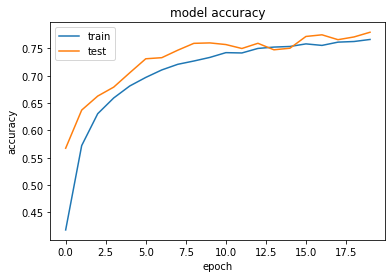

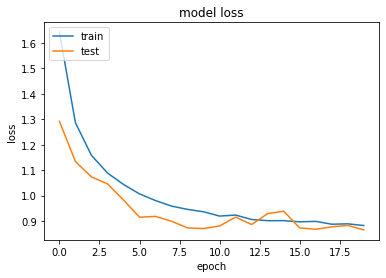

In [12]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In Aufgabe G haben wir uns mit der Vermeidung des Overfitting auseinander gesetzt. Um die Differenz zwischen der Genauigkeit auf Test- & Trainingsset zu verringern, haben wir Regularisierer ins Model eingeführt. Hierbei haben wir Dropout Layer und KernelRegularizer verwendet. 

Dropout-Layer sorgen dafür, dass zufällig einzelne Units/Neuronen 'fallen gelassen' werden - diese also zwischendurch ausgelassen/nicht benutzt werden. Dadurch kann verhindert werden, dass die Neuronen sich zu sehr gegenseitig beeinflussen und sich aneinander 'gewöhnen'.

Durch den kernel_regulizer können 'Strafen' auf die Gewichtung der einzelnen Schichten-Parameter oder der Schicht-Aktivitäten während der Optimierung des Systems verhängt werden. Indem über die L2-Norm unsere loss-Funktion um diesen Kernel-Regulizer erweitert wird, kann weiteres Overfitting verhindert werden.

Das Ergebnis lässt auf eine deutliche Verbesserung im Vergleich zu unserem Model aus Aufgabe F schließen: Statt eines Accuracy-Unterschiedes zwischen Test- und Trainingsset von 24.04%, konnten wir beim Testset eine Genauigkeit von 77.99%, beim Trainingsset eine von 77.58% erzielen. Somit ist die Differenz der Genauigkeiten auf 0.41% gesunken - nicht mal ein halbes Prozent und konnten somit also das Problem des Overfittings unseres Netzwerks nahezu komplett lösen. Wenn man die Graphen zur Aufgabe F vergleicht fällt direkt auf, dass die Kurven sich nicht direkt zu beginn schneiden sondern sich die test Linie mit der train Linie entwickelt. Also findet hier durch unsere eingesetzten Regularisierer kein Auswendiglernen statt.